# Preparing the Data

TensorFlow contains the MNIST data set already, and we can load it with Keras.
- 28x28 images of hand-written digits 0-9, 60k training samples and 10k testing samples

In [137]:
import tensorflow as tf # Using Python 3.11.0
mnist = tf.keras.datasets.mnist

Unpack the datasets into training data and testing data. Testing should NOT be part of the training process, only for validation and accuracy testing.

In [138]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [139]:
x_train.shape

(60000, 28, 28)

Can show a plot of a given image by plotting pixel values, in color or in binary format.

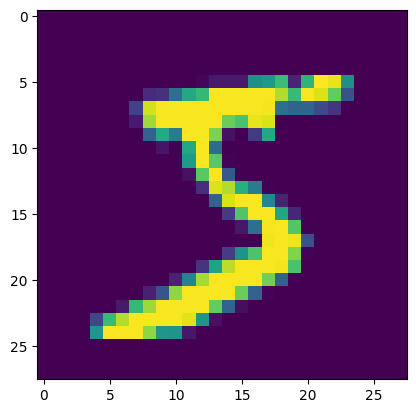

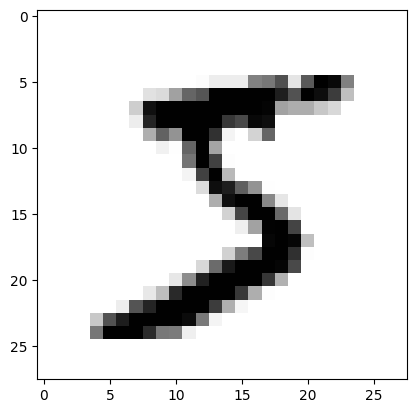

In [140]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]) # Get the first image in the dataset
plt.show() # For colored images, must be explicitly rendered to be shown
plt.imshow(x_train[0], cmap=plt.cm.binary) # For binary (B+W) images, it is rendered and shown immediately (shows inverted)

Can check the value of each pixel in the image by printing the image, each image is just a collection of pixel values.

In [141]:
print(x_train[0]) # The image is represented as a 2D array of pixel values, 0=black, 255=white

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

To pre-process the data we can normalize it, which means to reduce the value range to in between 0 and 1 to properly capture the range of data. For our example, I will consider a binary implementation instead, meaning that either a pixel is detected or not.

In [142]:
import numpy as np

# How to normally normalize data
x_train_norm = tf.keras.utils.normalize(x_train, axis=1) # Normalize the pixel values to be between 0 and 1
x_test_norm = tf.keras.utils.normalize(x_test, axis=1)

# Custom binary normalization
x_train_bin = np.where(x_train > 0, 1, 0)
x_test_bin = np.where(x_test > 0, 1, 0)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

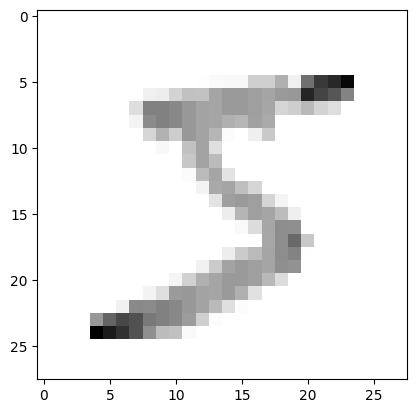

In [143]:
plt.imshow(x_train_norm[0], cmap=plt.cm.binary)
print(x_train_norm[0])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 

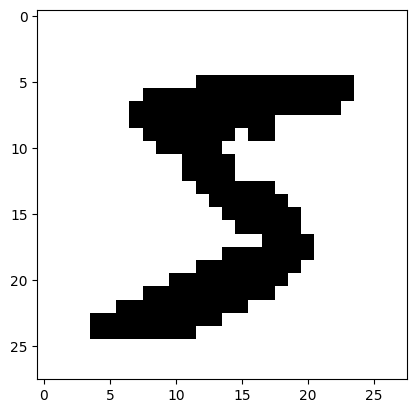

In [144]:
plt.imshow(x_train_bin[0], cmap=plt.cm.binary)
print(x_train_bin[0])

We can also see the corresponding y-value (AKA the output, which is the digit that the image is classified as) for each of the training images.

In [145]:
print(y_train[0]) # The label for the first image

5


Now we resize the images, since this is all part of how convolutional neural networks (CNN) are done. Convolutional layers in CNNs expect input data to have a specific shape, typically `batch_size, height, width, channels`.

In [146]:
IMG_SIZE = 28
x_trainr = np.array(x_train_bin).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # Introduces another dimension (makes it 3D) for kernel (filter) operation by using -1 as a placeholder, 1=grayscale
x_testr = np.array(x_test_bin).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # Introduces another dimension (makes it 3D) for kernel (filter) operation by using -1 as a placeholder, 1=grayscale
print("Training Samples dimensions:", x_trainr.shape)
print("Testing Samples dimensions:", x_testr.shape)

Training Samples dimensions: (60000, 28, 28, 1)
Testing Samples dimensions: (10000, 28, 28, 1)


# Creating a Deep Neural Network
We continue training the 60,000 samples from the dataset by repeatedly using a Convolutional layer, an Activation layer, and a Max Pooling layer (3 times in this case).
- **Convolution**: Various kernels (filters), which are generated matrices, undergo convolution with areas of the image to highlight specific features
- **Activation**: A function applied to all neuron inputs to produce a certain output
- **Max Pooling**: An operation that reduces the size of feature maps by taking the maximum value within a certain matrix size, retaining as much information as possible

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [148]:
model = Sequential() # Create a sequential model, running through each convolutional layer in sequence

## Convolutional Layer 1 (input=28*28 => conv=26*26*64 => pool=13*13*64)
model.add(Conv2D(64, (3,3), input_shape=x_trainr.shape[1:])) # 64 filters (chosen empirically), 3x3 kernel size, input shape is the shape of the image
model.add(Activation("relu")) # Rectified Linear Unit activation function, defined as f(x) = max(0, x), is good for breaking linearity and solving vanishing gradient problem
model.add(MaxPooling2D(pool_size=(2,2))) # Replaces every 2x2 matrix with the maximum value in that matrix, effectively reducing the size of the image by half

## Convolutional Layer 2 (input=13*13*64 => conv=11*11*64 => pool=5*5*64, rounds down)
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

## Convolutional Layer 3 (input=5*5,64 => conv=3*3*64 => pool=1*1*64)
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


c:\Users\Eleas Vrahnos\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We then add fully connected layers to the model to help reduce the output to just the 10 possible digit outputs.
- **Flatten**: The data is flattened to 1D, essentially just a reshape
- **Dense**: The fully connected layer, which uses a defined number of neurons to take in weights from all neurons in the previous layer
- **Activation**:  A function applied to all neuron inputs to produce a certain output

In [149]:
## Fully Connected Layer 1 (input=1*1*64 => flatten=64, each value in this vector represents an activation (feature) extracted from the previous layer)
model.add(Flatten()) # Flatten the data from 2D to 1D
model.add(Dense(64)) # 64 neurons in the fully connected layer
model.add(Activation("relu"))

## Fully Connected Layer 2 (input=64 => output=32)
model.add(Dense(32)) # 32 neurons in the fully connected layer
model.add(Activation("relu"))

## Fully Connected Layer 3 (input=32 => output=10)
model.add(Dense(10)) # 10 neurons in the fully connected layer, final layer must have the same number of neurons as the number of classes (possible outputs)
model.add(Activation("softmax")) # Softmax activation function, used for multi-class classification, returns a probability distribution over the classes

In [150]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

# Training and Testing the Model
Now the model can be compiled and trained.
- **Compilation**
  - **Loss function**: A way to measure how well the model is performing during training, want to be as small as possible
  - **Optimizer**: A method of adjusting the weights and biases to minimize the loss function
  - **Metrics**: What insights to keep track of to evaluate model performance

In [151]:
model.compile(loss="sparse_categorical_crossentropy", # Loss function for multi-class classification, good for when the classes are integers as opposed to one-hot encoded (0/1)
              optimizer="adam", # Adaptive Moment Estimation, good for large datasets, combination of RMSProp and AdaGrad, based off of mean and variance of the gradients
              metrics=["accuracy"]) # Accuracy is a good metric for classification problems
model.fit(x_trainr,
          y_train,
          epochs=10, # Number of times the model will see the entire dataset
          validation_split=0.3) # Set aside 30% of the data for validation during training, not used to update the weights

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8079 - loss: 0.6046 - val_accuracy: 0.9593 - val_loss: 0.1263
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9651 - loss: 0.1120 - val_accuracy: 0.9658 - val_loss: 0.1138
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9759 - loss: 0.0772 - val_accuracy: 0.9733 - val_loss: 0.0874
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9805 - loss: 0.0625 - val_accuracy: 0.9787 - val_loss: 0.0757
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9838 - loss: 0.0519 - val_accuracy: 0.9769 - val_loss: 0.0803
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9884 - loss: 0.0378 - val_accuracy: 0.9776 - val_loss: 0.0757
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9890 - loss: 0.0327 - val_accuracy: 0.9788 - val_loss: 0.0781
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9916 - loss: 0.0250 - 

The trained model can be tested with the MNIST dataset.

In [152]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9744 - loss: 0.1034
Test Loss 0.08477219939231873
Test Accuracy 0.9790999889373779


# Model Predictions
We can use the model to predict values as well. The predictions generated are then converted to a one-hot encoded vector (setting the highest probability's index to 1, rest are 0) to make the final prediction.

In [167]:
predictions = model.predict([x_testr])
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[4.6914963e-08 4.5568697e-08 1.4926149e-05 ... 9.9998116e-01
  1.5979346e-08 2.4551196e-06]
 [3.2223050e-12 3.9967461e-12 1.0000000e+00 ... 4.5653503e-12
  6.0023194e-13 5.5047341e-15]
 [3.5045532e-06 9.9984705e-01 1.5753548e-06 ... 9.0039073e-05
  3.6641424e-05 3.9982128e-06]
 ...
 [1.3589013e-11 1.4854926e-10 3.5274318e-11 ... 1.2815502e-09
  1.1280249e-10 5.5983548e-07]
 [2.2255172e-11 6.2429706e-12 5.0608801e-13 ... 5.8126136e-11
  3.7465387e-08 5.5466148e-07]
 [6.0366040e-07 1.8293017e-08 6.4052728e-08 ... 5.8729050e-14
  5.2096768e-11 4.4149934e-10]]


Each array corresponds to one test image. The array is a distribution of probabilities that that index is in the image. For example, the highest probability of the first test image resides in index 7, and so the model's prediction is that the image number is a 7.

In [168]:
print(np.argmax(predictions[0])) # Get the index of the highest probability in the prediction

7


We can confirm this prediction is correct by looking at the image.

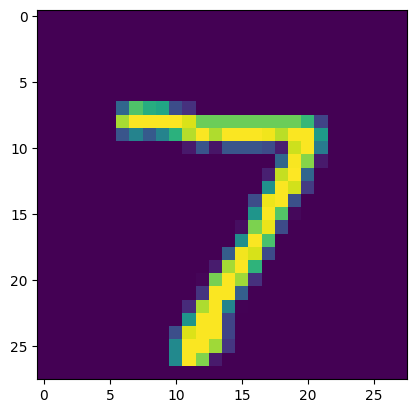

In [169]:
plt.imshow(x_test[0])

# Testing with Custom Images
To test with custom images, I have created a test image to use.

In [170]:
import cv2 # pip install opencv-python
img = cv2.imread("test.png")

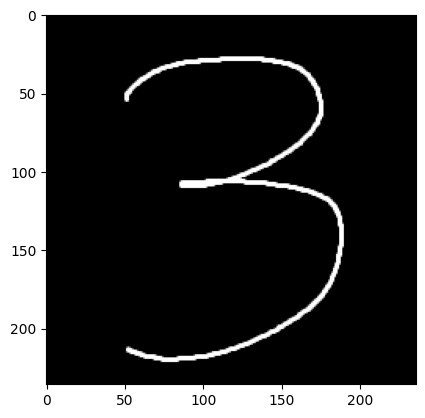

In [171]:
plt.imshow(img)

The image must go through the same steps of grayscaling, resizing, pixel value normalizing, and reshaping.

In [173]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Grayscale image dimensions:", gray.shape)

# Resize the image to 28x28
resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
print("Resized image dimensions:", resized.shape)

# Normalize and reshape the image
newimg = np.where(resized > 0, 1, 0)
reshaped = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Reshaped image dimensions:", reshaped.shape)

Grayscale image dimensions: (236, 236)
Resized image dimensions: (28, 28)
Reshaped image dimensions: (1, 28, 28, 1)


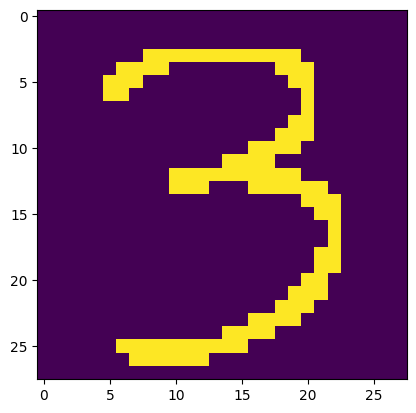

In [174]:
plt.imshow(reshaped[0])

We can then run the image through the model for a prediction based on its training.

In [176]:
predictions = model.predict(reshaped)
print(np.argmax(predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
3


# Applications
Below is a small demonstration that shows the capabilities of this model in real time. It will not be 100% accurate since the MNIST dataset is mainly for academic purposes and not for training real images, but it gives reasonable predictions.

In [177]:
# Error checking for opening video
cap = cv2.VideoCapture("demo.mp4")
if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cannot open video")

# Text configuration
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# Setting up area to display the class
text = "Class: "
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y = 50
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 70, text_offset_y + text_height + 10))
text_offset_y = text_offset_y + text_height // 2

# Frame counter for skipping frames, to reduce processing time
frame_counter = 0

while True:
  ret, frame = cap.read()
  if not ret: # If the frame is not read, such as at the end of the video
    break

  frame_counter += 1
  if frame_counter % 2 == 0: # Skips every other frame
    continue

  # Process the frame
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
  newimg = np.where(resized > 0, 1, 0)
  reshaped = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
  

  # Getting the prediction
  predictions = model.predict(reshaped)
  predicted_class = str(np.argmax(predictions))

  # Draw a white rectangle to put the text in front of it
  cv2.rectangle(frame, box_coords[0], box_coords[1], (255, 255, 255), cv2.FILLED)
  
  # Put the text in front of the white rectangle
  cv2.putText(frame, text + predicted_class, (text_offset_x, text_offset_y + text_height), font, fontScale=font_scale, color=(0, 0, 0), thickness=2)
  
  # Show the popup window
  cv2.imshow("Handwritten Digit Recognition", frame)

  # Break the loop (close the window) if the user presses 'q'
  if cv2.waitKey(2) & 0xFF == ord("w"):
    plt.imshow(reshaped[0], cmap=plt.cm.binary)
    plt.show()

  # Break the loop (close the window) if the user presses 'q'
  if cv2.waitKey(2) & 0xFF == ord("q"):
    break

# Cleanup
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━